# T81-558: Applications of Deep Neural Networks
**Module 9: Regularization: L1, L2 and Dropout**
* Instructor: [Jeff Heaton](https://sites.wustl.edu/jeffheaton/), McKelvey School of Engineering, [Washington University in St. Louis](https://engineering.wustl.edu/Programs/Pages/default.aspx)
* For more information visit the [class website](https://sites.wustl.edu/jeffheaton/t81-558/).

# Module Video Material

Main video lecture:

* [Part 9.1: Introduction to Keras Transfer Learning](https://www.youtube.com/watch?v=xyymDGReKdY&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=26)
* [Part 9.2: Popular Pretrained Neural Networks for Keras](https://www.youtube.com/watch?v=CEFcwpBneFo&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=27)
* [Part 9.3: Transfer Learning for Computer Vision and Keras](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28)
* [Part 9.4: Transfer Learning for Languages and Keras](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28)
* [Part 9.5: Transfer Learning for Keras Feature Engineering](https://www.youtube.com/watch?v=JPqwyuK7bPg&list=PLjy4p-07OYzulelvJ5KVaT2pDlxivl_BN&index=28)

# Part 9.1: Introduction to Keras Transfer Learning

Human beings learn new skills throughout their entire lives.  However, this learning is rarely from scratch.  No matter what task a human is learning, they are most likely drawing on experiences from earlier in life to learn this new skill.  In this way, humans learn much differently than most deep learning projects. 

At some point, a human being learns to tell the difference between a cat and a dog.  To teach a neural network the difference you would obtain a large quantity of cat pictures and dog pictures.  The neural network would iterate over all of these pictures and train on the differences.  The human child that learned to distinguish between the two animals would probably just need to see a few examples where they were told they were looking at each type of animal.  The human child would use previous knowledge of looking at different living and non-living objects to help make this classification.  The child would already know what sub-objects, such as fur, eyes, ears, noses, tails, and teeth looked like.

Transfer learning attempts to teach a neural network by similar means.  Rather than training your neural network from scratch, you begin training with preloaded set of weights. Usually you will simply remove the top-most layers of the pretrained neural network and retrain it with new topmost layers.  The layers remaining from the previous neural network will be locked so that training does not change these weights.  Only the newly added layers will be trained.  This process is summarized in the following figure.

![Transfer Learning](https://raw.githubusercontent.com/jeffheaton/t81_558_deep_learning/master/images/transfer.png "Transfer Learning")

It can take a great deal of compute power to train a neural network for a large image dataset.  Google, Facebook, Microsoft, and other tech companies have utilized GPU arrays to train high quality neural networks for a variety of applications.  Transferring these weights into your neural network can save you considerable effort and compute time.  It is unlikely that a pretrained model will exactly fit the application that you seek to implement.  Finding the closest pretrained model and using transfer learning is an important skill for a deep learning engineer.

The [imagenet dataset]() has several high quality neural networks fit to it.  In the next parts of this module we will take a much closer look at this data set.  For many image recognition tasks, an imagenet trained neural network can be a great starting point for your own neural networks.

### Transfer Learning Example

Lets look at an example of where transfer learning could be used to build upon an imagenet neural network.  Microsoft released a website that accepts a picture of a dog and attempts to classify these dogs by breed. The Microsoft dog breed website is provided here: 

[What breed is that dog?](https://www.bing.com/visualsearch/Microsoft/WhatDog)

To do this, it ie necessary to obtain pictures of dogs, labeled according to breed. Such a network could be trained entirely from scratch.  However, it would require a large quantity of breed-labeled pictures.  Transfer learning with imagenet could be very beneficial for a neural network project such as this.  A neural network pre-trained on imagenet would already contain neurons that are able to recognize many subcomponents of the various dog breeds that the neural network had previously seen on the other animal images in imagenet.




In [ ]:
import pandas as pd
import io
import requests
import numpy as np
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

df = pd.read_csv(
    "https://data.heatonresearch.com/data/t81-558/iris.csv", 
    na_values=['NA', '?'])

# Convert to numpy - Classification
x = df[['sepal_l', 'sepal_w', 'petal_l', 'petal_w']].values
dummies = pd.get_dummies(df['species']) # Classification
species = dummies.columns
y = dummies.values


# Build neural network
model = Sequential()
model.add(Dense(50, input_dim=x.shape[1], activation='relu')) # Hidden 1
model.add(Dense(25, activation='relu')) # Hidden 2
model.add(Dense(y.shape[1],activation='softmax')) # Output

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(x,y,verbose=2,epochs=100)

To keep this example simple, we are not setting aside a validation set.  The goal of this example is to show how to create a multi-layer neural network and transfer the weights to another.  Next we evaluate the accuracy on the training set.


In [ ]:
from sklearn.metrics import accuracy_score
pred = model.predict(x)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

Viewing the model summary is as expected, we can see the three layers previously defined.

In [ ]:
model.summary()

Now that we've trained a neural network on the iris dataset the knowledge of this neural network can be transferred to other neural networks.  It is possible to create a new neural network from some or all of the layers of this neural network.  Just to demonstrate the technique, we will create a new neural network that is essentially a clone of the first neural network.  This is done by transferring all of the layers from the original neural network into the new one.

In [ ]:
model2 = Sequential()
for layer in model.layers:
    model2.add(layer)
model2.summary()

As a sanity check, we would like to calculate the accuracy of the newly created model.  The in-sample accuracy should be the same as the previous model that the new model is based on.

In [ ]:
from sklearn.metrics import accuracy_score
pred = model2.predict(x)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

The in-sample accuracy of the newly created neural network is the same as the original neural network.  We've successfully transferred all of the layers from the original neural network.

For this example we are going to train a neural network to classify three new hypothetical flowers that are uncreatively named:

* Fake Flower 1
* Fake Flower 2
* Fake Flower 3
* Fake Flower 4

We have measurements for samples of these flowers that conform to the predictors contained in the original iris dataset: sepal width, sepal length, petal width, and petal length. For transfer learning to be effective the input for the newly trained neural network most closely conform to the original neural network that we are transferring from. 

We will strip away the last output layer that contains the softmax activation function that performs this final classification.  A new output layer will be created that will classify the 4 new flowers.  Only the weights in this new layer will be trained.  The first two layers will be marked as non-trainable.  The hope is that the first few layers have learned to abstract the raw input data in a way that is also helpful to the new neural network.

This is done by looping over the first few layers and copying them to the new neural network. We output a summary of the new neural network to verify that the previous output layer has been stripped.

In [ ]:
model3 = Sequential()
for i in range(2):
    layer = model.layers[i]
    layer.trainable = False
    model3.add(layer)
model3.summary()

To complete the new neural network we add a 4-neuron classification layer and compile for classification.

In [ ]:
model3.add(Dense(4,activation='softmax')) # Output

model3.compile(loss='categorical_crossentropy', optimizer='adam')
model3.summary()

Next we generate some training data for the 4 fake flowers, and train the neural network.

In [ ]:
x = np.array([
    [2.1,0.9,0.8,1.1], # 1
    [2.5,1.2,0.8,1.2],
    [1.1,3.1,1.1,1.1], # 2
    [0.8,2.2,0.7,1.2],
    [1.2,0.7,3.1,1.1], # 3
    [1.0,1.1,2.4,0.9],
    [0.1,1.1,4.1,1.2], # 4
    [1.2,0.8,3.1,0.1],
])

y = np.array([
    [0,0,0,1],
    [0,0,0,1],
    [0,0,1,0],
    [0,0,1,0],
    [0,1,0,0],
    [0,1,0,0],
    [1,0,0,0],
    [1,0,0,0],
])

model3.fit(x,y,verbose=0,epochs=1000)

We can evaluate the in-sample accuracy for the new model, that contains transferred layers from the previous model.

In [ ]:
from sklearn.metrics import accuracy_score
pred = model3.predict(x)
predict_classes = np.argmax(pred,axis=1)
expected_classes = np.argmax(y,axis=1)
correct = accuracy_score(expected_classes,predict_classes)
print(f"Training Accuracy: {correct}")

# Part 9.2: Popular Pretrained Neural Networks for Keras

The following two sites, among others, can be great starting points to find pretrained models for use in your projects:

* [TensorFlow Model Zoo](https://modelzoo.co/)
* [Papers with Code](https://paperswithcode.com/)

Keras contains built in support for several pretrained models.  The the [complete list](https://keras.io/applications/) can be found in the Keras documentation.

### DenseNet

The [Dense Convolutional Network (DenseNet)](https://arxiv.org/abs/1608.06993) model is [provided by keras](https://keras.io/applications/#densenet). Recent work has shown that convolutional networks can be substantially deeper, more accurate, and efficient to train if they contain shorter connections between layers close to the input and those close to the output. In this paper, we embrace this observation and introduce the Dense Convolutional Network (DenseNet), which connects each layer to every other layer in a feed-forward fashion. Whereas traditional convolutional networks with L layers have L connections - one between each layer and its subsequent layer - our network has L(L+1)/2 direct connections. For each layer, the feature-maps of all preceding layers are used as inputs, and its own feature-maps are used as inputs into all subsequent layers. DenseNets have several compelling advantages: they alleviate the vanishing-gradient problem, strengthen feature propagation, encourage feature reuse, and substantially reduce the number of parameters. We evaluate our proposed architecture on four highly competitive object recognition benchmark tasks (CIFAR-10, CIFAR-100, SVHN, and ImageNet). DenseNets obtain significant improvements over the state-of-the-art on most of them, whilst requiring less computation to achieve high performance. Code and pre-trained models are available in Keras.

### InceptionResNetV2 and InceptionV3

The [Inception ResNet V2](https://arxiv.org/pdf/1512.00567v3.pdf) model is [provided by Keras](https://keras.io/applications/#inceptionresnetv2). A convolutional neural network (CNN) that achieves a new state of the art in terms of accuracy on the ILSVRC image classification benchmark. Inception-ResNet-v2 is a variation of our earlier Inception V3 model which borrows some ideas from Microsoft's ResNet papers.

### MobileNet

The [MobileNet](https://arxiv.org/abs/1704.04861) model is [provided by Keras].(https://keras.io/applications/#mobilenetv2). Created for mobile and embedded vision applications. MobileNets are based on a streamlined architecture that uses depth-wise separable convolutions to build light weight deep neural networks. We introduce two simple global hyper-parameters that efficiently trade off between latency and accuracy. These hyper-parameters allow the model builder to choose the right sized model for their application based on the constraints of the problem. We present extensive experiments on resource and accuracy tradeoffs and show strong performance compared to other popular models on ImageNet classification. We then demonstrate the effectiveness of MobileNets across a wide range of applications and use cases including object detection, finegrain classification, face attributes and large scale geo-localization.


### MobileNetV2

The [MobileNet V2](https://arxiv.org/abs/1801.04381) model is [provided by Keras](https://keras.io/applications/#mobilenetv2). Improves the state of the art performance of mobile models on multiple tasks and benchmarks as well as across a spectrum of different model sizes. We also describe efficient ways of applying these mobile models to object detection in a novel framework we call SSDLite. Additionally, we demonstrate how to build mobile semantic segmentation models through a reduced form of DeepLabv3 which we call Mobile DeepLabv3. 

### NASNet

The [NASNet](https://arxiv.org/abs/1707.07012) model is [provided by Keras](https://keras.io/applications/#nasnet). Developing neural network image classification models often requires significant architecture engineering. In this paper, we study a method to learn the model architectures directly on the dataset of interest. As this approach is expensive when the dataset is large, we propose to search for an architectural building block on a small dataset and then transfer the block to a larger dataset. The key contribution of this work is the design of a new search space (the "NASNet search space") which enables transferability. In our experiments, we search for the best convolutional layer (or "cell") on the CIFAR-10 dataset and then apply this cell to the ImageNet dataset by stacking together more copies of this cell, each with their own parameters to design a convolutional architecture, named "NASNet architecture". We also introduce a new regularization technique called ScheduledDropPath that significantly improves generalization in the NASNet models. On CIFAR-10 itself, NASNet achieves 2.4% error rate, which is state-of-the-art. On ImageNet, NASNet achieves, among the published works, state-of-the-art accuracy of 82.7% top-1 and 96.2% top-5 on ImageNet. Our model is 1.2% better in top-1 accuracy than the best human-invented architectures while having 9 billion fewer FLOPS - a reduction of 28% in computational demand from the previous state-of-the-art model. When evaluated at different levels of computational cost, accuracies of NASNets exceed those of the state-of-the-art human-designed models. For instance, a small version of NASNet also achieves 74% top-1 accuracy, which is 3.1% better than equivalently-sized, state-of-the-art models for mobile platforms. Finally, the learned features by NASNet used with the Faster-RCNN framework surpass state-of-the-art by 4.0% achieving 43.1% mAP on the COCO dataset.

### ResNet, ResNetV2, ResNeXt

The [ResNet](https://arxiv.org/abs/1512.03385), [ResNetV2](https://arxiv.org/abs/1603.05027), and [ResNeXt](https://arxiv.org/abs/1611.05431) models are [provided by Keras](https://keras.io/applications/#resnet). Deep residual networks have emerged as a family of extremely deep architectures showing compelling accuracy and nice convergence behaviors. In this paper, we analyze the propagation formulations behind the residual building blocks, which suggest that the forward and backward signals can be directly propagated from one block to any other block, when using identity mappings as the skip connections and after-addition activation. A series of ablation experiments support the importance of these identity mappings. This motivates us to propose a new residual unit, which makes training easier and improves generalization. We report improved results using a 1001-layer ResNet on CIFAR-10 (4.62% error) and CIFAR-100, and a 200-layer ResNet on ImageNet. Code is available at: this https URL



### VGG16 and VGG19

The [VGG16 and VGG19](https://arxiv.org/abs/1409.1556) models are [provided by Keras](https://keras.io/applications/#vgg16). In this work we investigate the effect of the convolutional network depth on its accuracy in the large-scale image recognition setting. Our main contribution is a thorough evaluation of networks of increasing depth using an architecture with very small (3x3) convolution filters, which shows that a significant improvement on the prior-art configurations can be achieved by pushing the depth to 16-19 weight layers. These findings were the basis of our ImageNet Challenge 2014 submission, where our team secured the first and the second places in the localisation and classification tracks respectively. We also show that our representations generalise well to other datasets, where they achieve state-of-the-art results. We have made our two best-performing ConvNet models publicly available to facilitate further research on the use of deep visual representations in computer vision.

### Xception

The [Xception](https://arxiv.org/abs/1610.02357) model is [provided by Keras](https://keras.io/applications/#xception). We present an interpretation of Inception modules in convolutional neural networks as being an intermediate step in-between regular convolution and the depthwise separable convolution operation (a depthwise convolution followed by a pointwise convolution). In this light, a depthwise separable convolution can be understood as an Inception module with a maximally large number of towers. This observation leads us to propose a novel deep convolutional neural network architecture inspired by Inception, where Inception modules have been replaced with depthwise separable convolutions. We show that this architecture, dubbed Xception, slightly outperforms Inception V3 on the ImageNet dataset (which Inception V3 was designed for), and significantly outperforms Inception V3 on a larger image classification dataset comprising 350 million images and 17,000 classes. Since the Xception architecture has the same number of parameters as Inception V3, the performance gains are not due to increased capacity but rather to a more efficient use of model parameters.


# Part 9.3: Transfer Learning for Computer Vision and Keras

In this part we will make use of transfer learning to create a simple neural network that can recognize dog breeds.  To keep the example simple, we will only train for a handfull of breeds.  A much more advanced form of this model can be found at the [Microsoft Dog Breed Image Search](https://www.bing.com/visualsearch/Microsoft/WhatDog).

To keep computation times to a minimum, we will make use of the MobileNet, which is built into Keras.  We will begin by loading the entire MobileNet and seeing how well it classifies with several test images.  MobileNet can classify 1,000 different images.  We will ultimatly extend it to classify image types that are not in its dataset, in this example 3 dog breeds.  However, we begin by classifying image types amoung those that it was trained on.  Even though our test images were not in its training set, the loaded neural network should be able to classify them.

In [ ]:
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

We begin by downloading weights for a MobileNet trained for the imagenet dataset.  This will take some time to download the first time you train the network.

In [ ]:
model = MobileNet(weights='imagenet',include_top=True)

The loaded network is a Keras neural network, just like those that we've been working with so far.  However, this is a neural network that was trained/engineered on advanced hardware.  Simply looking at the structure of an advanced state-of-the-art neural network can be educational.

In [ ]:
model.summary()

Just examining the above structure, several clues to neural network architecture become evident.

Notice how some of the layers have zeros in their number of parameters. Items which are hyperparameters are always zero, nothing about that layer is learned.  The other layers have learnable paramaters that are adjusted as training occurs.  The layer types are all hyperparamaters, Keras will not change a convolution layer to a max pooling layer for you.  However, the layers that have parameters are trained/adjusted by the traning algorithm. Most of the parameters seen above are the weights of the neural network.

Some of the parameters are maked as non-trainable.  These cannot be adjusted by the training algorithm.  When we later use transfer learning with this model we will strip off the final layers that classify 1000 items and replace with our 3 dog breed classification layer.  Only our new layers will be trainable, we will mark the existing layers as non-trainable.

The Relu activation function is used throught the neural network.  Also batch and dropout normalization are used.  We cannot see the percent used for batch normalization, that might be specified in the origional paper.  Many deep neural networks are pyramid shaped, and this is the case for this one.  This neural network uses and expanding pyramid shape as you can see the neuron/filter counts expand from 32 to 64 to 128 to 256 to 512 and max out at 1,024.

We will now use the MobileNet to classify several image URL's below.  You can add additional URL's of your own to see how well the MobileNet can classify.

In [ ]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://cdn.shopify.com/s/files/1/0712/4751/products/SMA-01_2000x.jpg?v=1537468751",
    "https://farm2.static.flickr.com/1394/967537586_87b1358ad3.jpg",
    "https://sites.wustl.edu/jeffheaton/files/2016/07/jheaton_wustl1-262izm5-458x458.jpg",
    "https://1.bp.blogspot.com/-0vGbvWUrSAA/XP-OurPTA4I/AAAAAAAAgtg/TGx6YiGBEGIMjnViDjvVnYzYp__DJ6I-gCLcBGAs/s320/B%252Bt%2525aMbJQkm3Z50rqput%252BA.jpg"
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))

    lst = decode_predictions(pred, top=5)
    for itm in lst[0]:
        print(itm)

Overall, the neural network is doing quite well.  However, it does not classify me as a "person", rather I am classified as a "suit".  Similarly, my English Bulldog Hickory is classiified as a "pug".  This is likely because I am only providiing a closeup of his face.

For many applications, MobileNet might be entirely acceptable as an image classifier.  However, if you need to classify very specialized images that are not in the 1,000 image types supported by imagenet, it is necessary to use transfer learning.

### Transfer

It is possable to create your own image classification network from scratch.  This would take considerable time and resources.  Just creating a dog breed classifier would require many pictures of dogs, labeled by breed.  By using a pretrained neural network, you are tapping into knowldge already built into the lower layaers of the nerual network.  The transferred layers likely already have some notion of eyes, ears, feet, and fur.  These lower level concepts help to train the neural network to identify dog breeds.

Next we reload the MobileNet; however, this time we set the *include_top* parameter to *False*. This instructs Keras to not load the final classification layers.  This is the common mode of operation for transfer learning.  We display a summary to see that the top classification layer is now missing.

In [ ]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

base_model.summary()

We will add new top layers to the neural network.  Our final SoftMax layer includes support for 3 classes.

In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
preds=Dense(3,activation='softmax')(x) 

Next, we mark the origional MobileNet layers as non-trainable and our new layers as trainable.

In [ ]:
model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

To train the neural network we must create a directory structure to hold the images.  The Keras command **flow_from_directory** performs this for us.  It requires that a folder be laid out as follows:

image

Each class is a folder that contains images of that class.  We can also specify a target size, in this case the origional MobileNet size of 224x224 is desired.

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) 

train_generator=train_datagen.flow_from_directory('/Users/jheaton/Downloads/trans', 
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=1,
                                                 class_mode='categorical',
                                                 shuffle=True)

We are now ready to compile and fit the neural network.  Notice we are using **fit_generator** rather than **fit**.  This is because we are using the convienent **ImageDataGenerator**.

In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

step_size_train=train_generator.n//train_generator.batch_size
model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=50)

We are now ready to see how our new model can predict dog breeds.  The URLs in the code below provide several example dogs to look at.  Feel free to add your own.

In [ ]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a8/02.Owczarek_niemiecki_u%C5%BCytkowy_kr%C3%B3tkow%C5%82osy_suka.jpg/2560px-02.Owczarek_niemiecki_u%C5%BCytkowy_kr%C3%B3tkow%C5%82osy_suka.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/5/51/DSHwiki.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e5/Axel%2C_the_English_Bulldog.jpg/440px-Axel%2C_the_English_Bulldog.jpg",
    "https://1.bp.blogspot.com/-0vGbvWUrSAA/XP-OurPTA4I/AAAAAAAAgtg/TGx6YiGBEGIMjnViDjvVnYzYp__DJ6I-gCLcBGAs/s320/B%252Bt%2525aMbJQkm3Z50rqput%252BA.jpg",
    "https://thehappypuppysite.com/wp-content/uploads/2017/12/poodle1.jpg",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/4/40/Pudel_Grossschwarz.jpg/440px-Pudel_Grossschwarz.jpg"
    
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(np.argmax(pred,axis=1))


# Part 9.4: Transfer Learning for Languages and Keras

Transfer learning is commonly used with Natural Language Processing (NLP).  This course has an entire module that covers NLP.  However, for now we will look how a NLP network can be loaded into Keras for transfer learning.  The following three sources were helpful for the creation of this section.

* Cer, D., Yang, Y., Kong, S. Y., Hua, N., Limtiaco, N., John, R. S., ... & Sung, Y. H. (2018). [Universal sentence encoder](https://arxiv.org/abs/1803.11175). arXiv preprint arXiv:1803.11175.
* [Deep Transfer Learning for Natural Language Processing — Text Classification with Universal Embeddings](https://towardsdatascience.com/deep-transfer-learning-for-natural-language-processing-text-classification-with-universal-1a2c69e5baa9)
* [Keras Tutorial - How to Use Google's Universal Sentence Encoder for Spam Classification](http://hunterheidenreich.com/blog/google-universal-sentence-encoder-in-keras/)

These examples make use of TensorFlow Hub, which allows pretrained models to easily be loaded into TensorFlow.  To install TensorHub use the following command.

In [ ]:
!pip install tensorflow_hub

It is also necessary to install TensorFlow Datasets.  This can be done with the following command.

In [ ]:
!pip install tensorflow_datasets

https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/tf2_text_classification.ipynb#scrollTo=2ew7HTbPpCJH

Load the Internet Movie DataBase (IMDB) reviews data set.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

# /Users/jheaton/tensorflow_datasets/imdb_reviews/plain_text/0.1.0

Load a pretrained embedding model called [gnews-swivel-20dim](https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1).  This was trained by Google on gnews data and can convert RAW text into vectors.  

In [2]:
model = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(model, output_shape=[20], input_shape=[], 
                           dtype=tf.string, trainable=True)

Consider the following 3 movie reviews.

In [3]:
train_examples[:3]

array([b"I absolutely LOVED this movie when I was a kid. I cried every time I watched it. It wasn't weird to me. I totally identified with the characters. I would love to see it again (and hope I wont be disappointed!). Pufnstuf rocks!!!! I was really drawn in to the fantasy world. And to me the movie was loooong. I wonder if I ever saw the series and have confused them? The acting I thought was strong. I loved Jack Wilde. He was so dreamy to an 10 year old (when I first saw the movie, not in 1970. I can still remember the characters vividly. The flute was totally believable and I can still 'feel' the evil woods. Witchy poo was scary - I wouldn't want to cross her path.",
       b'A very close and sharp discription of the bubbling and dynamic emotional world of specialy one 18year old guy, that makes his first experiences in his gay love to an other boy, during an vacation with a part of his family.<br /><br />I liked this film because of his extremly clear and surrogated storytelling 

The embedding layer can convert each to 20-number vectors.

In [4]:
hub_layer(train_examples[:3])

<tf.Tensor: id=309, shape=(3, 20), dtype=float32, numpy=
array([[ 2.0660517 , -4.491833  ,  3.6127415 , -0.6699504 , -7.310619  ,
        -4.402696  , -4.3286967 ,  2.5536625 ,  5.506356  ,  1.5327201 ,
        -4.539875  ,  0.2960692 ,  1.5209124 ,  1.1145658 , -6.6717415 ,
         3.1345682 ,  5.0351944 , -2.2035742 , -3.4724264 , -0.7029331 ],
       [ 2.2850306 , -1.3994653 ,  1.9646566 , -1.8079202 , -0.3574569 ,
        -0.12123204, -0.82485604,  0.20197354,  2.4308808 , -1.8707466 ,
        -1.8008713 ,  0.9650812 , -1.3530476 , -0.10591842, -2.7889197 ,
         0.69957316,  2.0551753 , -1.6120912 , -2.8612442 , -0.7083347 ],
       [ 3.9819887 , -4.4838037 ,  5.177359  , -2.3643482 , -3.2938678 ,
        -3.5364532 , -2.4786978 ,  2.5525482 ,  6.688532  , -2.3076782 ,
        -1.9807833 ,  1.1315885 , -3.0339816 , -0.7604128 , -5.743445  ,
         3.4242578 ,  4.790099  , -4.03061   , -5.992149  , -1.7297493 ]],
      dtype=float32)>

We add addition layers to attempt to classify the movie reviews as either positive or negative.

In [5]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Compile the neural network.

In [6]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Split and train the neural network.

In [7]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [8]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 147us/sample - loss: 0.8996 - accuracy: 0.5348 - val_loss: 0.7075 - val_accuracy: 0.5826
Epoch 2/40
15000/15000 [==============================] - 2s 119us/sample - loss: 0.6725 - accuracy: 0.5999 - val_loss: 0.6488 - val_accuracy: 0.6217
Epoch 3/40
15000/15000 [==============================] - 2s 115us/sample - loss: 0.6324 - accuracy: 0.6427 - val_loss: 0.6163 - val_accuracy: 0.6603
Epoch 4/40
15000/15000 [==============================] - 2s 114us/sample - loss: 0.5967 - accuracy: 0.6821 - val_loss: 0.5823 - val_accuracy: 0.6916
Epoch 5/40
15000/15000 [==============================] - 2s 116us/sample - loss: 0.5579 - accuracy: 0.7186 - val_loss: 0.5474 - val_accuracy: 0.7224
Epoch 6/40
15000/15000 [==============================] - 2s 114us/sample - loss: 0.5190 - accuracy: 0.7516 - val_loss: 0.5132 - val_accuracy: 0.7492
Epoch 7/40
15000/15000 [==========================

In [ ]:
Evaluate the neural network.

In [9]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 3s 116us/sample - loss: 0.4037 - accuracy: 0.8580
[0.4036788517403603, 0.85804]


In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

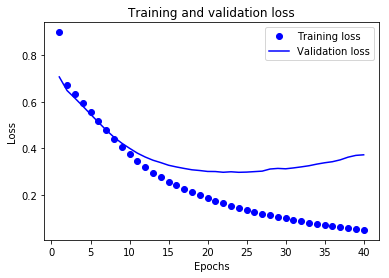

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

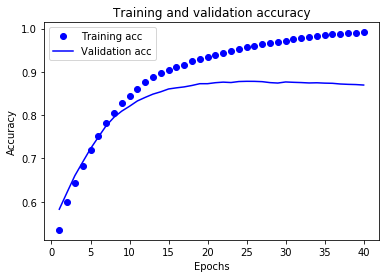

In [12]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Part 9.5: Transfer Learning for Keras Feature Engineering

http://cs231n.github.io/transfer-learning/

/Users/jheaton/miniconda3/envs/tensorflow-2.0/lib/python3.6/site-packages/keras_applications/mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


'___________________________________________________________________________________________'

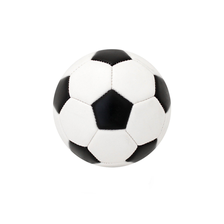

(1, 7, 7, 1024)
[[[[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.26743937 0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 6.         0.
    0.        ]
   [0.         0.         0.         ... 5.2920284  0.
    0.        ]
   ...
   [0.         0.         0.         ... 0.36230087 0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    1.6294484 ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]

  [[0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.

In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import tensorflow.keras
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML
from tensorflow.keras.applications.mobilenet import decode_predictions

model = MobileNet(weights='imagenet',include_top=False)

IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224
IMAGE_CHANNELS = 3

images = [
    "https://cdn.shopify.com/s/files/1/0712/4751/products/SMA-01_2000x.jpg?v=1537468751"
]


def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img
        
for url in images:
    x = []
    ImageFile.LOAD_TRUNCATED_IMAGES = False
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.load()
    img = img.resize((IMAGE_WIDTH,IMAGE_HEIGHT),Image.ANTIALIAS)
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    pred = model.predict(x)
    
    display("___________________________________________________________________________________________")
    display(img)
    print(pred.shape)
    print(pred)
    


In [14]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 

# Module 9 Assignment

You can find the first assignment here: [assignment 9](https://github.com/jeffheaton/t81_558_deep_learning/blob/master/assignments/assignment_yourname_class9.ipynb)